In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("D:\Study Materials\Internship\Project 3_Basic ML _ Kyphosis-20240313T141403Z-001\Project 3_Basic ML _ Kyphosis\kyphosis.csv")
df.head()
#- Age: in months
#- Number: the number of vertebrae involved
#- Start: the number of the first (topmost) vertebra operated on.

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [4]:
## SMOTE - Synthetic Minority Oversampling TEchnique, used for imbalanced datasets, basically adding more examples to balance the data

<AxesSubplot:>

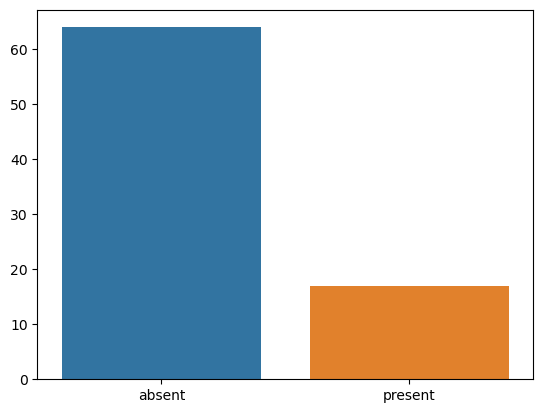

In [5]:
vc= df['Kyphosis'].value_counts()
sns.barplot(x= vc.index, y= vc.values)

In [6]:
x = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

x_np= x.to_numpy()
y_np = y.to_numpy()
import sys
print(sys.getsizeof(x))
print(sys.getsizeof(x_np))
print(sys.getsizeof(y))
print(sys.getsizeof(y_np))

y = y.apply(lambda x: 1 if x == 'present' else 0)
y_np = np.where(y_np == 'present',1,0)

2088
120
5264
104


## For fitting data into a model it is always better to use numpy instead of dataframes since it will consume less memory and be faster. So it is better to convert to numpy before fitting

## What is the difference between hot encoding and label encoding?
## To prevent biases from being introduced, One-Hot Encoding is preferable for nominal data (where there is no inherent order among categories). Label encoding, however, might be more appropriate for ordinal data (where categories naturally have an order). The effect of dimensionality should also be taken into account

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, stratify = y) ## stratify - makes test dist. to be the same as the whole dist.
x_train_np, x_test_np, y_train_np, y_test_np = train_test_split(x_np,y_np,test_size=0.3, stratify = y)

print(x_train.shape, x_test.shape, y_train.shape , y_test.shape)
print(x_train_np.shape, x_test_np.shape, y_train_np.shape , y_test_np.shape)
print(type(x_train), type(x_train_np))

(56, 3) (25, 3) (56,) (25,)
(56, 3) (25, 3) (56,) (25,)
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


<AxesSubplot:>

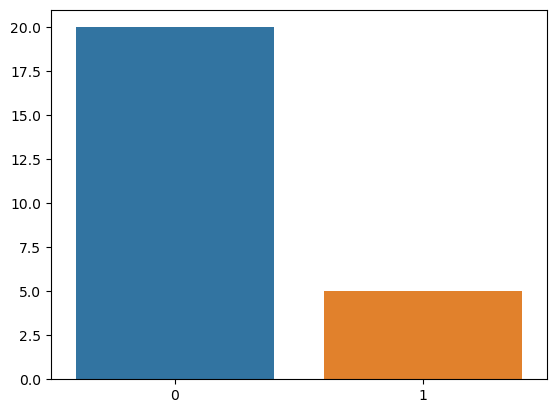

In [19]:
vc= y_test.value_counts()
sns.barplot(x= vc.index, y= vc.values)
# SMOTE

## Standardization/Normalization should be done after train test split

In [22]:
from timeit import default_timer as timer

start = timer()
lr= LogisticRegression(multi_class= 'ovr')
lr.fit(x_train, y_train)
lr.predict(x_test)
print(timer() - start)

0.005720900000000029


In [23]:
start = timer()
lr= LogisticRegression()
lr.fit(x_train_np, y_train_np)
ans= lr.predict(x_test_np)
ans_p= lr.predict_proba(x_test_np)
print(timer() - start)

0.005593700000005697


In [24]:
for i,j in enumerate(ans == y_test_np):
    if not j:
        print(ans[i])

0
0
1


In [25]:
accuracy_score(ans, y_test_np)

0.88

In [26]:
min_max_scaler= MinMaxScaler()
standard_scaler= StandardScaler()

min_max_scaler.fit(x_train_np)
x_train_np_mm= min_max_scaler.transform(x_train_np)
x_test_np_mm = min_max_scaler.transform(x_test_np)

In [27]:
start = timer()
lr.fit(x_train_np_mm, y_train_np)
accuracy_score(lr.predict(x_test_np_mm),y_test_np)
print(timer() - start)

0.002440599999999904


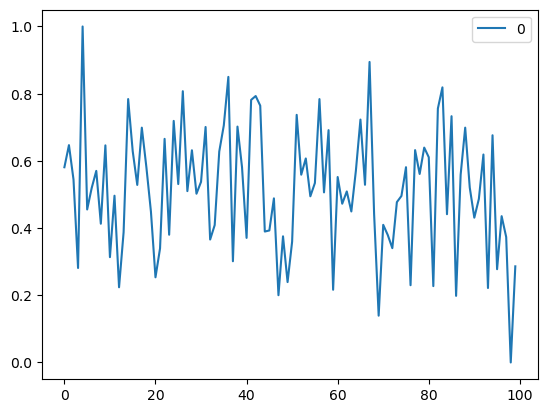

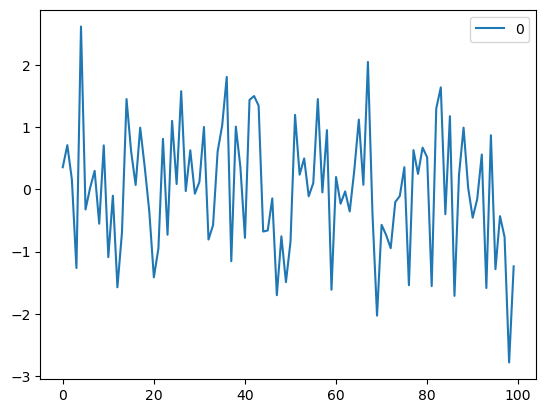

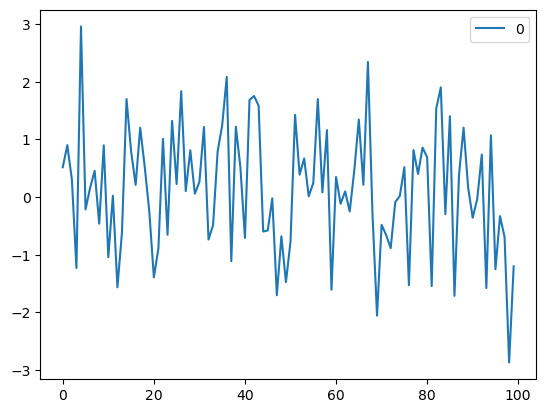

In [39]:
import matplotlib.pyplot as plt
arr= np.random.randn(100,1)
mm_scaler= MinMaxScaler()
std_scaler= StandardScaler()

mms_arr= mm_scaler.fit_transform(arr)
std_arr= std_scaler.fit_transform(arr)

sns.lineplot(data=mms_arr)
plt.show()
sns.lineplot(data=std_arr)
plt.show()
sns.lineplot(data=arr)
plt.show()

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_np_mm, y_train)
accuracy_score(gnb.predict(x_test_np_mm), y_test_np)

0.8

In [30]:
print(lr.coef_)

[[ 0.58754737  1.23199995 -1.18159235]]


In [31]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", gamma=0.2, C=1.0)
svm.fit(x_train_np_mm, y_train)
accuracy_score(svm.predict(x_test_np_mm), y_test_np)

0.8

0.8


[Text(0.5, 0.9, 'X[0] <= 0.002\ngini = 0.337\nsamples = 56\nvalue = [44, 12]'),
 Text(0.25, 0.7, 'X[2] <= 0.812\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.7, 'X[0] <= 0.666\ngini = 0.306\nsamples = 53\nvalue = [43, 10]'),
 Text(0.625, 0.5, 'X[0] <= 0.627\ngini = 0.363\nsamples = 42\nvalue = [32, 10]'),
 Text(0.5, 0.3, 'X[0] <= 0.093\ngini = 0.295\nsamples = 39\nvalue = [32, 7]'),
 Text(0.375, 0.1, 'gini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.625, 0.1, 'gini = 0.238\nsamples = 29\nvalue = [25, 4]'),
 Text(0.75, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]')]

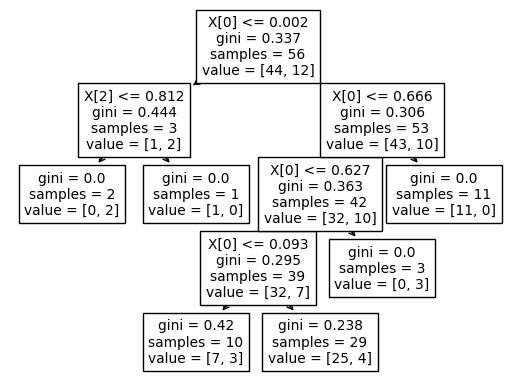

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc= DecisionTreeClassifier(max_depth = 4, criterion='gini')
dtc.fit(x_train_np_mm, y_train)
print(accuracy_score(dtc.predict(x_test_np_mm), y_test_np))
tree.plot_tree(dtc)

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(max_depth = 5, n_estimators= 10)
rfc.fit(x_train_np_mm, y_train_np)
print(accuracy_score(rfc.predict(x_test_np_mm), y_test_np))

0.76


In [34]:
### Hyperparametric tuning using gridsearchcv()
forest_params = [{'max_depth': list(range(2, 12)), 'n_estimators': [10,50,100,150,200]}]
model_cv = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

model_cv.fit(x_train_np_mm, y_train_np)
print(accuracy_score(model_cv.predict(x_test_np_mm), y_test_np))

0.8


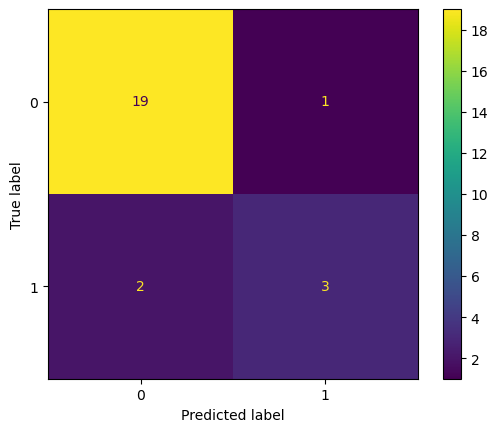

In [35]:
cm = confusion_matrix(y_test_np, ans)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [40]:
ans_p[:,0]

array([0.92526283, 0.95486956, 0.78809057, 0.58177685, 0.28295863,
       0.94994579, 0.96546974, 0.38785374, 0.95679393, 0.98388832,
       0.85151738, 0.92122742, 0.25631249, 0.7067504 , 0.82925932,
       0.92793081, 0.87500883, 0.92404077, 0.65183266, 0.90540079,
       0.98442146, 0.92915555, 0.69455575, 0.02866541, 0.86665241])

In [41]:
print(classification_report(y_test_np,ans))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.75      0.60      0.67         5

    accuracy                           0.88        25
   macro avg       0.83      0.77      0.80        25
weighted avg       0.87      0.88      0.87        25

